# Projeto 1 de LPAA - Análise e Exploração de Dados - LEANDRO DANTAS LIMA (059.323.894-00)

In [2]:
# importando bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
from pandas import DataFrame

In [3]:
# desativar mensagens de warnings
pd.options.mode.chained_assignment = None

In [4]:
# importando o banco de dados UFO Sightings para análise
df = pd.read_csv("scrubbed.csv", sep=",", on_bad_lines='skip', low_memory=False)

In [5]:
# criando uma cópia do dataframe para manter o backup do original
df_copy = df.copy(deep=True)  # deep=True (padrão) o novo objeto será criado com uma cópia dos dados e índices do objeto original, sem alterações no original.

In [6]:
# mostrando as 3 primeiras linhas para entender os dados
df_copy.head(3)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667


In [7]:
# mostrando as propriedades do df
df_copy.shape

(80332, 11)

In [8]:
# mostrando as colunas do df
df_copy.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [9]:
# mostrando os tipos de dados --> quando não consegue definir, classifica como object
df_copy.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [10]:
# mostrando os índices
df_copy.index

RangeIndex(start=0, stop=80332, step=1)

In [11]:
# resumo estatístico do df --> apenas colunas com dados numéricos
df_copy.describe()

,longitude
count,80332.000000
mean,-86.772885
std,39.697205
min,-176.658056
25%,-112.073333
50%,-87.903611
75%,-78.755000
max,178.441900


In [12]:
# conferindo e contando se há valores ausentes no df
df_copy.isna().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [13]:
# limpando dados ausentes
df_copy_clean1 = df_copy.dropna()

In [14]:
# conferindo se ainda há valores ausentes
df_copy_clean1.isna().sum()

datetime                0
city                    0
state                   0
country                 0
shape                   0
duration (seconds)      0
duration (hours/min)    0
comments                0
date posted             0
latitude                0
longitude               0
dtype: int64

In [15]:
# avaliando os tipos de dados por coluna
df_copy_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66516 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              66516 non-null  object 
 1   city                  66516 non-null  object 
 2   state                 66516 non-null  object 
 3   country               66516 non-null  object 
 4   shape                 66516 non-null  object 
 5   duration (seconds)    66516 non-null  object 
 6   duration (hours/min)  66516 non-null  object 
 7   comments              66516 non-null  object 
 8   date posted           66516 non-null  object 
 9   latitude              66516 non-null  object 
 10  longitude             66516 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.1+ MB


In [16]:
# corrigindo dados não numéricos para estatísticas
col_num = ['duration (seconds)', 'latitude', 'longitude ']

def to_type(DataFrame, columns, type):
    for col in columns:
        DataFrame[col] = DataFrame[col].astype(type)
        
to_type(df_copy_clean1, col_num, 'float')

In [17]:
# reconferindo tipo de dados na coluna latitude
df_copy_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66516 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              66516 non-null  object 
 1   city                  66516 non-null  object 
 2   state                 66516 non-null  object 
 3   country               66516 non-null  object 
 4   shape                 66516 non-null  object 
 5   duration (seconds)    66516 non-null  float64
 6   duration (hours/min)  66516 non-null  object 
 7   comments              66516 non-null  object 
 8   date posted           66516 non-null  object 
 9   latitude              66516 non-null  float64
 10  longitude             66516 non-null  float64
dtypes: float64(3), object(8)
memory usage: 6.1+ MB


In [18]:
# filtrando dados para localização com data, local e duração
coord = ['datetime',  'latitude', 'longitude ', 'duration (seconds)', 'city', 'state', 'country', 'shape']
local = df_copy_clean1[coord]

In [19]:
# exportando/salvando coordenadas para uma planilha excel
local.to_excel(r'coordenadas.xlsx')

In [20]:
# contando elementos da coluna country
df_copy_clean1.country.value_counts()

country
us    63553
ca     2942
gb       11
au       10
Name: count, dtype: int64

In [21]:
# contando elementos da coluna state
df_copy_clean1.state.value_counts()

state
ca    8683
fl    3754
wa    3709
tx    3398
ny    2915
      ... 
nf      15
pe      10
dc       8
yt       7
yk       2
Name: count, Length: 67, dtype: int64

In [22]:
# contando elementos da coluna city
df_copy_clean1.city.value_counts()

city
seattle                           471
phoenix                           438
las vegas                         356
portland                          354
los angeles                       347
                                 ... 
egg harbor city                     1
garrettsville                       1
king of prussia (5 miles from)      1
moosup                              1
calmar (canada)                     1
Name: count, Length: 11920, dtype: int64

In [23]:
# contando elementos da coluna shape
df_copy_clean1['shape'].value_counts()

shape
light        14130
triangle      6817
circle        6405
fireball      5364
unknown       4774
other         4705
sphere        4552
disk          4319
oval          3160
formation     2088
cigar         1717
changing      1653
flash         1124
rectangle     1117
cylinder      1079
diamond        969
chevron        852
teardrop       614
egg            609
cone           257
cross          197
delta            7
round            2
pyramid          1
flare            1
hexagon          1
crescent         1
changed          1
Name: count, dtype: int64

In [24]:
# separando elementos da data de aparição
date_time = df_copy_clean1['datetime'].str.split('/')
print(date_time.head(1000))

0       [10, 10, 1949 20:30]
3       [10, 10, 1956 21:00]
4       [10, 10, 1960 20:00]
5       [10, 10, 1961 19:00]
7       [10, 10, 1965 23:45]
                ...         
1187    [10, 12, 2013 04:30]
1188    [10, 12, 2013 07:17]
1189    [10, 12, 2013 07:45]
1190    [10, 12, 2013 13:00]
1191    [10, 12, 2013 14:35]
Name: datetime, Length: 1000, dtype: object


In [25]:
# separando dia de datetime
day = df_copy_clean1['datetime'].str.split('/').str[1]
day

0        10
3        10
4        10
5        10
7        10
         ..
80327     9
80328     9
80329     9
80330     9
80331     9
Name: datetime, Length: 66516, dtype: object

In [26]:
# contando aparições por dia do mês
day.value_counts()

datetime
15    4846
1     4534
4     2665
20    2513
10    2386
30    2094
12    2092
13    2075
5     2058
14    2056
25    2016
16    1996
3     1973
19    1954
24    1938
7     1934
6     1930
8     1927
17    1926
28    1925
23    1919
18    1918
22    1909
11    1873
21    1871
2     1823
9     1814
27    1714
26    1693
29    1660
31    1484
Name: count, dtype: int64

In [27]:
# separando mês de datetime
mond = df_copy_clean1['datetime'].str.split('/').str[0]
mond

0        10
3        10
4        10
5        10
7        10
         ..
80327     9
80328     9
80329     9
80330     9
80331     9
Name: datetime, Length: 66516, dtype: object

In [28]:
# contando aparições por mês do ano
mond.value_counts()

datetime
7     7972
8     7152
6     6607
9     6360
10    6321
11    5702
12    4652
1     4596
4     4509
3     4482
5     4346
2     3817
Name: count, dtype: int64

In [29]:
# separando apenas ano em uma coluna
ano = df_copy_clean1['datetime'].str.split('/').str[2].str.split(' ').str[0]

In [30]:
ano

0        1949
3        1956
4        1960
5        1961
7        1965
         ... 
80327    2013
80328    2013
80329    2013
80330    2013
80331    2013
Name: datetime, Length: 66516, dtype: object

In [31]:
# contando aparições por ano
ano.value_counts()

datetime
2012    6489
2013    6237
2011    4456
2008    4089
2009    3743
        ... 
1943       1
1941       1
1920       1
1925       1
1934       1
Name: count, Length: 83, dtype: int64

In [32]:
# criando a coluna ano no dataframe
df_copy_clean1['year'] = ano

In [33]:
# conferindo coluna ano criada
df_copy_clean1.head(3)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,1949
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,1956
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,1960


In [34]:
# mostrando colunas atuais do df
df_copy_clean1.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude ', 'year'],
      dtype='object')

In [35]:
# reordenando colunas do dataframe para melhor análise
df_copy_clean1 = df_copy_clean1[['datetime', 'year', 'duration (seconds)', 'country', 'state', 'city',  'latitude', 'longitude ', 'shape']]

In [36]:
# mostrando colunas reordenadas
df_copy_clean1.head(3)

,datetime,year,duration (seconds),country,state,city,latitude,longitude,shape
0,10/10/1949 20:30,1949,2700.0,us,tx,san marcos,29.883056,-97.941111,cylinder
3,10/10/1956 21:00,1956,20.0,us,tx,edna,28.978333,-96.645833,circle
4,10/10/1960 20:00,1960,900.0,us,hi,kaneohe,21.418056,-157.803611,light


In [37]:
# contando duração das aparições
df_copy_clean1['duration (seconds)'].value_counts()

duration (seconds)
300.0        7254
120.0        5973
600.0        5223
60.0         4830
180.0        4261
             ... 
7894800.0       1
60600.0         1
555.0           1
212.0           1
181.0           1
Name: count, Length: 466, dtype: int64

In [38]:
# média de duração das aparições
df_copy_clean1['duration (seconds)'].mean()

6572.996773708581

In [39]:
# desvio padrão duração das aparições
desv_pad = df_copy_clean1['duration (seconds)'].std()
desv_pad

510890.9587046626

In [40]:
# estatísticas da duração das aparições
df_copy_clean1['duration (seconds)'].describe()

count    6.651600e+04
mean     6.572997e+03
std      5.108910e+05
min      1.000000e-02
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      8.280000e+07
Name: duration (seconds), dtype: float64

array([<Axes: ylabel='Density'>], dtype=object)

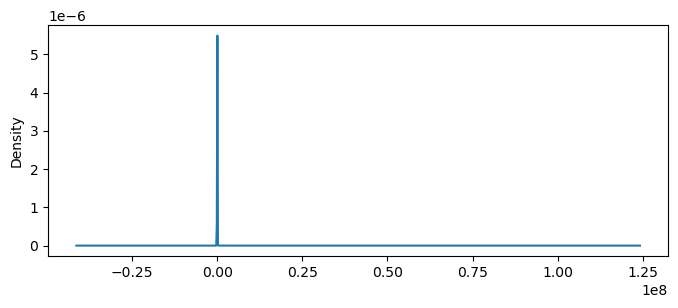

In [41]:
# gráfico KDE (Kernel Density Function)
df_copy_clean1['duration (seconds)'].plot.kde(subplots = True, figsize = (8,3))

In [43]:
# Removendo elementos acima do 3º quartil para melhorar análise dos dados
df_remove = df_copy_clean1['duration (seconds)'].loc[(df_copy_clean1['duration (seconds)'] > 600)]

In [44]:
# criando novo df sem os dados acima do 3º quartil
df_copy_clean2 = df_copy_clean1.drop(df_remove.index)

In [45]:
# novas dimensões do df
df_copy_clean2.shape

(51513, 9)

array([<Axes: ylabel='Density'>], dtype=object)

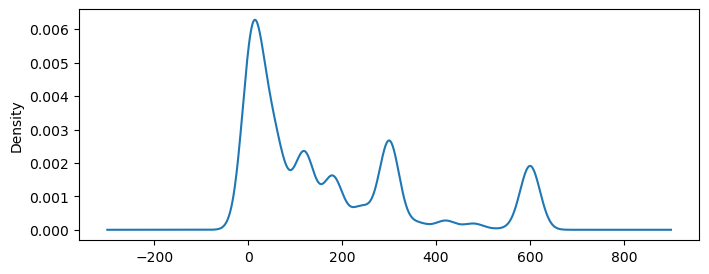

In [46]:
# gráfico KDE (Kernel Density Function)
df_copy_clean2['duration (seconds)'].plot.kde(subplots = True, figsize = (8,3))

In [47]:
# contando duração das aparições
df_copy_clean2['duration (seconds)'].value_counts()

duration (seconds)
300.00    7254
120.00    5973
600.00    5223
60.00     4830
180.00    4261
          ... 
300.13       1
345.50       1
56.00        1
71.00        1
181.00       1
Name: count, Length: 202, dtype: int64

In [48]:
# estatísticas da duração das aparições (melhoradas)
df_copy_clean2['duration (seconds)'].describe()

count    51513.000000
mean       168.461289
std        185.567019
min          0.010000
25%         15.000000
50%        120.000000
75%        300.000000
max        600.000000
Name: duration (seconds), dtype: float64

In [49]:
# conferindo se há dados duplicados
df_copy_clean2[df_copy_clean2.duplicated()]

,datetime,year,duration (seconds),country,state,city,latitude,longitude,shape
310,10/11/1999 20:15,1999,30.0,us,ny,portville,42.038611,-78.341111,oval
312,10/11/1999 20:15,1999,60.0,us,ny,portville,42.038611,-78.341111,oval
761,10/1/2005 01:00,2005,600.0,us,il,tinley park,41.573333,-87.784444,circle
971,10/1/2013 12:30,2013,60.0,us,pa,pittsburgh,40.440556,-79.996111,unknown
1135,10/12/2010 10:00,2010,300.0,us,ca,milpitas,37.428333,-121.905556,other
...,...,...,...,...,...,...,...,...,...
76577,9/2/1999 21:00,1999,180.0,us,ak,seward,60.104167,-149.442222,light
77437,9/24/2009 20:15,2009,2.0,us,ga,hamilton,32.757778,-84.875000,fireball
77938,9/26/2013 21:30,2013,180.0,us,sc,north myrtle beach,33.815833,-78.680278,circle
78757,9/30/2007 22:00,2007,90.0,us,ga,portal,32.538056,-81.932500,triangle


In [50]:
# removendo dados duplicados do df
df_copy_clean2 = df_copy_clean2.drop_duplicates()

In [51]:
# exibindo novos dados estatísticos
df_copy_clean2.describe()

,duration (seconds),latitude,longitude
count,51249.000000,51249.000000,51249.000000
mean,168.285477,38.747070,-95.177920
std,185.475368,5.834198,18.535220
min,0.010000,-34.928661,-176.658056
25%,15.000000,34.256944,-114.321667
50%,120.000000,39.326944,-89.401111
75%,300.000000,42.381111,-80.280000
max,600.000000,72.700000,153.099533


In [52]:
# informações do df limpo
df_copy_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51249 entries, 3 to 80330
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            51249 non-null  object 
 1   year                51249 non-null  object 
 2   duration (seconds)  51249 non-null  float64
 3   country             51249 non-null  object 
 4   state               51249 non-null  object 
 5   city                51249 non-null  object 
 6   latitude            51249 non-null  float64
 7   longitude           51249 non-null  float64
 8   shape               51249 non-null  object 
dtypes: float64(3), object(6)
memory usage: 3.9+ MB


In [53]:
# corrigindo dados não numéricos para estatísticas
to_type(df_copy_clean2, ['year'], 'float')

In [54]:
df_copy_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51249 entries, 3 to 80330
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            51249 non-null  object 
 1   year                51249 non-null  float64
 2   duration (seconds)  51249 non-null  float64
 3   country             51249 non-null  object 
 4   state               51249 non-null  object 
 5   city                51249 non-null  object 
 6   latitude            51249 non-null  float64
 7   longitude           51249 non-null  float64
 8   shape               51249 non-null  object 
dtypes: float64(4), object(5)
memory usage: 3.9+ MB


In [131]:
# estatísticas dos anos de aparição
df_copy_clean2['year'].describe()

count    51249.000000
mean      2004.461960
std         10.025378
min       1910.000000
25%       2002.000000
50%       2007.000000
75%       2011.000000
max       2014.000000
Name: year, dtype: float64

In [134]:
# estatísticas df (matriz transposta)
df_copy_clean2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,51249.0,2004.461960,10.025378,1910.000000,2002.000000,2007.000000,2011.000000,2014.000000
duration (seconds),51249.0,168.285477,185.475368,0.010000,15.000000,120.000000,300.000000,600.000000
latitude,51249.0,38.747070,5.834198,-34.928661,34.256944,39.326944,42.381111,72.700000
longitude,51249.0,-95.177920,18.535220,-176.658056,-114.321667,-89.401111,-80.280000,153.099533


In [56]:
# instalando o Folium
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [57]:
# Importando biblioteca e plugins Folium para o Jupyter Notebook - biblioteca para criação de mapas interativos
import folium
from folium import plugins

In [58]:
# conferindo versão do folium
folium.__version__

'0.15.1'

In [59]:
# criação de uma lista contendo todas as coordenadas (latitude, longitude) do df
coordenadas = []

for lat, lon in zip(df_copy_clean2['latitude'].values, df_copy_clean2['longitude '].values):
    coordenadas.append([lat, lon])

In [60]:
# imprimindo lista de coordenadas
coordenadas

[[28.9783333, -96.6458333],
 [36.595, -82.1888889],
 [33.5861111, -86.2861111],
 [30.2947222, -82.9841667],
 [33.9163889, -118.3516667],
 [35.2333333, -82.7344444],
 [37.1536111, -83.7619444],
 [35.8238889, -80.2536111],
 [42.5377778, -83.2330556],
 [32.8544444, -79.975],
 [45.5827778, -122.3522222],
 [29.4238889, -98.4933333],
 [38.2541667, -85.7594444],
 [40.7008333, -73.7133333],
 [32.7152778, -117.1563889],
 [29.7630556, -95.3630556],
 [32.7833333, -96.8],
 [42.9955556, -71.4552778],
 [29.7630556, -95.3630556],
 [44.7630556, -85.6205556],
 [41.0338889, -73.7633333],
 [43.0388889, -87.9063889],
 [43.9627778, -70.2830556],
 [40.015, -105.27],
 [47.6063889, -122.3308333],
 [34.1577778, -118.6375],
 [46.7163889, -122.9530556],
 [31.7058333, -83.6533333],
 [40.2736111, -76.8847222],
 [29.6158333, -95.5575],
 [35.8905556, -83.7247222],
 [32.7591667, -97.7969444],
 [40.6936111, -89.5888889],
 [36.2522222, -85.9516667],
 [42.9097222, -73.8955556],
 [34.1027778, -91.9922222],
 [39.0725, -93

In [124]:
# plotando mapa com folium

# folium.Map() --> chamada da biblioteca folium e do atributo Map
# location=[37.091211, -95.702891] --> mapa centrado nos EUA
# zoom_start --> ajuste inicial no tamanho do mapa
# tile --> 'camada' de visualização do mapa
mapa = folium.Map(location=[37.091211, -95.702891], zoom_start=3, tile='Stamen Terrain')

In [125]:
mapa

In [126]:
# HeatMap --> gerando mapa de calor
mapa.add_child(plugins.HeatMap(coordenadas))

In [127]:
# mostrando algumas coordenadas de avistamento
i = 0

while i < 100:
    folium.Marker(location=coordenadas[i], popup=folium.Popup("UFO", parse_html=True, max_width=100)).add_to(mapa)
    i += 1

In [128]:
mapa

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

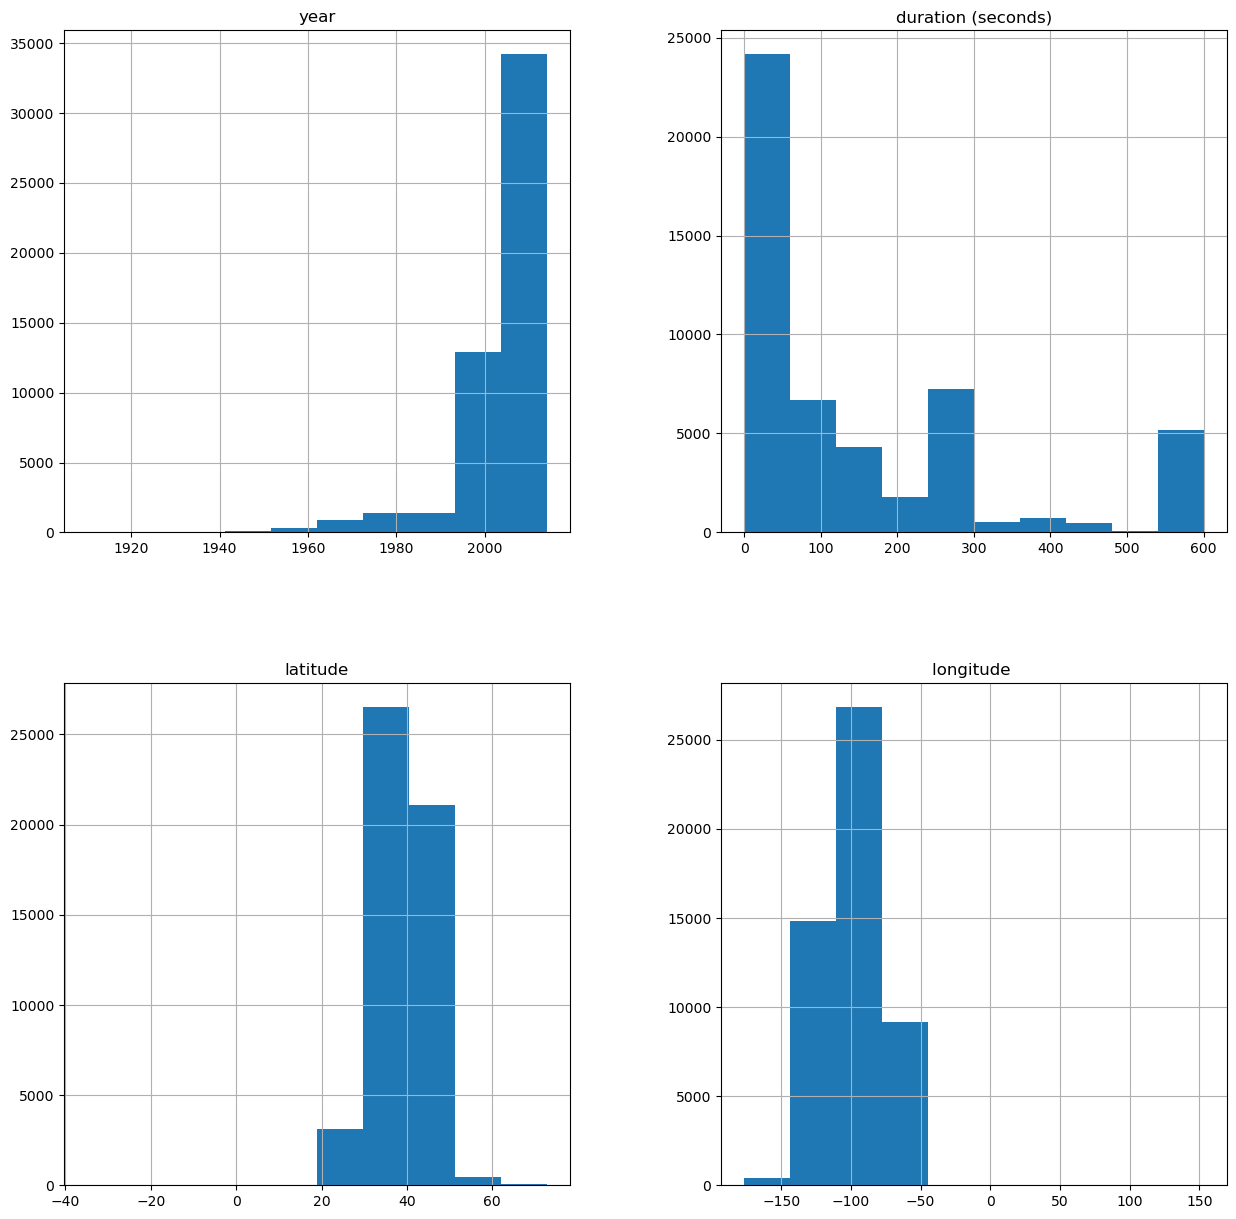

In [136]:
# plotando histogramas
df_copy_clean2.hist(figsize=(15,15))
plt.show()